In [11]:
#Creating Low-resolution images [train]
%run create_lr_img.py --input_dir "C:/Users/User/Desktop/SRGAN/div2k_train_val/train/train_hr" --output_dir "C:/Users/User/Desktop/SRGAN/div2k_train_val/train/train_lr"


Processing 400 images from C:/Users/User/Desktop/SRGAN/div2k_train_val/train/train_hr...


100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [01:08<00:00,  5.82it/s]

Done! LR images saved in C:/Users/User/Desktop/SRGAN/div2k_train_val/train/train_lr


In [1]:
#Creating Low-resolution images [validation]
%run create_lr_img.py --input_dir "C:/Users/User/Desktop/SRGAN/div2k_train_val/val/val_hr" --output_dir "C:/Users/User/Desktop/SRGAN/div2k_train_val/val/val_lr"


Processing 20 images from C:/Users/User/Desktop/SRGAN/div2k_train_val/val/val_hr...


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:03<00:00,  6.38it/s]

Done! LR images saved in C:/Users/User/Desktop/SRGAN/div2k_train_val/val/val_lr


In [2]:
#--help
%run crop_image.py --help
print("\n\n\n")
%run train.py --help

usage: crop_image.py [-h] --image IMAGE --coords COORDS

optional arguments:
  -h, --help       show this help message and exit
  --image IMAGE    Path to input image
  --coords COORDS  Bounding box coordinates in "x1,y1,w1,h1 x2,y2,w2,h2" format




usage: train.py [-h] [--train_hr_dir TRAIN_HR_DIR] [--train_lr_dir TRAIN_LR_DIR] [--valid_hr_dir VALID_HR_DIR]
                [--valid_lr_dir VALID_LR_DIR] [--upscale_factor {2,3,4,8}] [--epochs EPOCHS] [--resume RESUME]
                [--mode {adversarial,generator}] [--pretrain PRETRAIN] [--cuda] [--out_dir OUT_DIR]

optional arguments:
  -h, --help            show this help message and exit
  --train_hr_dir TRAIN_HR_DIR
                        Path to high-resolution training images
  --train_lr_dir TRAIN_LR_DIR
                        Path to low-resolution training images
  --valid_hr_dir VALID_HR_DIR
                        Path to high-resolution validation images
  --valid_lr_dir VALID_LR_DIR
                        Path to low-r

In [3]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA Device Name:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("CUDA not available, using CPU.")


CUDA Device Name: NVIDIA GeForce GTX 1650


Total training patches: 21180


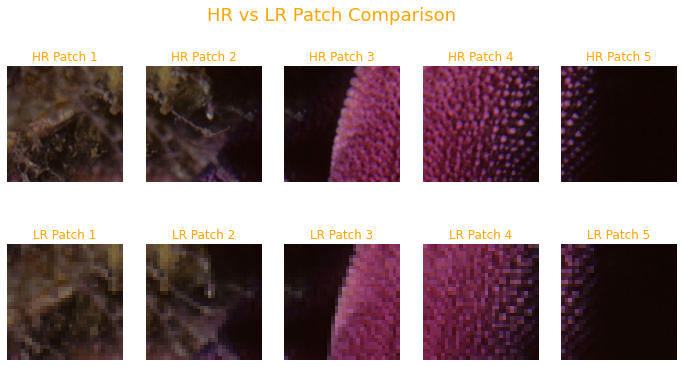

In [2]:
#To check if the number of patches and the output samples are aligned and correct [Train]
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torch
from utils import DIV2KTrainSet

# Initialize Training Dataset & DataLoader
train_set = DIV2KTrainSet(
    hr_dir="C:/Users/User/Desktop/SRGAN/div2k_train_val/train/train_hr/",
    lr_dir="C:/Users/User/Desktop/SRGAN/div2k_train_val/train/train_lr/",
    patch_size=128
)

trainloader = DataLoader(train_set, batch_size=1, shuffle=True)
print(f"Total training patches: {len(train_set)}")  # Display total patches

# Load a few samples
num_samples = 5
fig, axes = plt.subplots(2, num_samples, figsize=(12, 6))  # 2 rows (HR/LR), 5 columns

for i in range(num_samples):
    hr_patch, lr_patch = train_set[i+29] #adjust the value to the desired patches 

    hr_patch_np = hr_patch.permute(1, 2, 0).cpu().numpy() * 0.5 + 0.5  # De-normalize HR
    lr_patch_np = lr_patch.permute(1, 2, 0).cpu().numpy()  # LR (already normalized correctly)

    # HR Patch
    axes[0, i].imshow(hr_patch_np)
    axes[0, i].set_title(f"HR Patch {i+1}", fontsize=12, color='orange')
    axes[0, i].axis("off")

    # LR Patch
    axes[1, i].imshow(lr_patch_np)
    axes[1, i].set_title(f"LR Patch {i+1}", fontsize=12, color='orange')
    axes[1, i].axis("off")

plt.suptitle("HR vs LR Patch Comparison", fontsize=18, color='orange')
plt.show()

Total validation images: 20


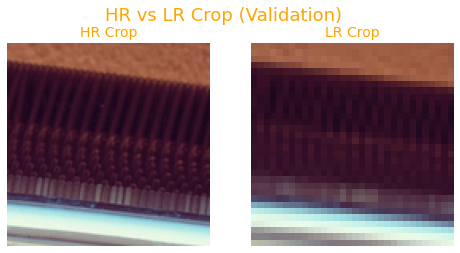

In [4]:
##To check if the number of patches and the output samples are aligned and correct [Validate]
from utils import DIV2KValidSet  # Ensure the dataset class is correctly imported

# Define validation directories
val_hr_dir = "C:/Users/User/Desktop/SRGAN/div2k_train_val/val/val_hr/"
val_lr_dir = "C:/Users/User/Desktop/SRGAN/div2k_train_val/val/val_lr/"

# Initialize Validation Dataset & DataLoader
valid_set = DIV2KValidSet(
    hr_dir=val_hr_dir,
    lr_dir=val_lr_dir,
    crop_size=128  # Center crop size
)

validloader = DataLoader(valid_set, batch_size=1, shuffle=False)
print(f"Total validation images: {len(valid_set)}")

# Fetch a validation sample
hr_crop, lr_crop = valid_set[11]  # Get first validation pair

# Convert HR & LR to NumPy for visualization
hr_crop_np = hr_crop.permute(1, 2, 0).cpu().numpy() * 0.5 + 0.5  # De-normalize HR
lr_crop_np = lr_crop.permute(1, 2, 0).cpu().numpy()  # LR (not normalized)

# Plot the HR and LR crops
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
fig.suptitle("HR vs LR Crop (Validation)", fontsize=18, color='orange')

# HR Image
axes[0].imshow(hr_crop_np)
axes[0].set_title("HR Crop", fontsize=14, color='orange')
axes[0].axis("off")

# LR Image
axes[1].imshow(lr_crop_np)
axes[1].set_title("LR Crop", fontsize=14, color='orange')
axes[1].axis("off")

plt.show()

In [1]:
#Training the generator with 5 patches per image only
%run train.py --train_hr_dir "C:/Users/User/Desktop/SRGAN/div2k_train_val/train/train_hr/" \
              --train_lr_dir "C:/Users/User/Desktop/SRGAN/div2k_train_val/train/train_lr/" \
              --valid_hr_dir "C:/Users/User/Desktop/SRGAN/div2k_train_val/val/val_hr/" \
              --valid_lr_dir "C:/Users/User/Desktop/SRGAN/div2k_train_val/val/val_lr/" --mode generator --cuda 

C:\Users\User\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch: 1/100


Img: 9   PSNR: 11.453516: 100%|████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.11it/s]


epoch: 2/100


Img: 9   PSNR: 11.813177: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.85it/s]


epoch: 3/100


Img: 9   PSNR: 12.579764: 100%|████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.04it/s]


epoch: 4/100


Img: 9   PSNR: 13.095886: 100%|████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.04it/s]


epoch: 5/100


Img: 9   PSNR: 13.255684: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.94it/s]


epoch: 6/100


Img: 9   PSNR: 13.487268: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.71it/s]


epoch: 7/100


Img: 9   PSNR: 13.903890: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.92it/s]


epoch: 8/100


Img: 9   PSNR: 13.862230: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.24it/s]


epoch: 9/100


Img: 9   PSNR: 14.174492: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.67it/s]


epoch: 10/100


Img: 9   PSNR: 14.918787: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.81it/s]


epoch: 11/100


Img: 9   PSNR: 14.351926: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.61it/s]


epoch: 12/100


Img: 9   PSNR: 14.825715: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.83it/s]


epoch: 13/100


Img: 9   PSNR: 14.480192: 100%|████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.61it/s]


epoch: 14/100


Img: 9   PSNR: 15.821264: 100%|████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.57it/s]


epoch: 15/100


Img: 9   PSNR: 15.669942: 100%|████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.62it/s]


epoch: 16/100


Img: 9   PSNR: 15.435734: 100%|████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.38it/s]


epoch: 17/100


Img: 9   PSNR: 15.612041: 100%|████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.64it/s]


epoch: 18/100


Img: 9   PSNR: 15.947847: 100%|████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.54it/s]


epoch: 19/100


Img: 9   PSNR: 15.840167: 100%|████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.65it/s]


epoch: 20/100


Img: 9   PSNR: 16.102489: 100%|████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.59it/s]


epoch: 21/100


Img: 9   PSNR: 16.599314: 100%|████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.54it/s]


epoch: 22/100


Img: 9   PSNR: 16.349106: 100%|████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.60it/s]


epoch: 23/100


Img: 9   PSNR: 16.784058: 100%|████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.59it/s]


epoch: 24/100


Img: 9   PSNR: 16.435240: 100%|████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.52it/s]


epoch: 25/100


Img: 9   PSNR: 16.302681: 100%|████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.41it/s]


epoch: 26/100


Img: 9   PSNR: 16.636543: 100%|████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.16it/s]


epoch: 27/100


Img: 9   PSNR: 16.718044: 100%|████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.60it/s]


epoch: 28/100


Img: 9   PSNR: 16.727209: 100%|████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.56it/s]


epoch: 29/100


Img: 9   PSNR: 16.815517: 100%|████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.62it/s]


epoch: 30/100


Img: 9   PSNR: 16.772629: 100%|████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.57it/s]


epoch: 31/100


Img: 9   PSNR: 16.417244: 100%|████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.56it/s]


epoch: 32/100


Img: 9   PSNR: 16.311228: 100%|████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.63it/s]


epoch: 33/100


Img: 9   PSNR: 16.560066: 100%|████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.58it/s]


epoch: 34/100


Img: 9   PSNR: 16.876545: 100%|████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.56it/s]


epoch: 35/100


Img: 9   PSNR: 16.553259: 100%|████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.57it/s]


epoch: 36/100


Img: 9   PSNR: 16.464848: 100%|████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.60it/s]


epoch: 37/100


Img: 9   PSNR: 16.889130: 100%|████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.64it/s]


epoch: 38/100


Img: 9   PSNR: 16.808374: 100%|████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.60it/s]


epoch: 39/100


Img: 9   PSNR: 16.632263: 100%|████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.59it/s]


epoch: 40/100


Img: 9   PSNR: 16.589451: 100%|████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.50it/s]


epoch: 41/100


Running Loss: 0.018919:   2%|█▏                                                         | 1/50 [00:02<01:54,  2.34s/it]


KeyboardInterrupt: 

In [1]:
#Training the generator with maximum amount of patches for 100 images
import time

def format_time(seconds):
    """Convert seconds into hours, minutes, and seconds."""
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    secs = seconds % 60
    return f"{hours}h {minutes}m {secs:.2f}s" if hours else (f"{minutes}m {secs:.2f}s" if minutes else f"{secs:.2f}s")

try:
    start_time = time.time()  # Start time
    print("Process started... Press CTRL+C to interrupt.")
    
    %run train.py --train_hr_dir "C:/Users/User/Desktop/SRGAN/div2k_train_val/train/train_hr/" \
                  --train_lr_dir "C:/Users/User/Desktop/SRGAN/div2k_train_val/train/train_lr/" \
                  --valid_hr_dir "C:/Users/User/Desktop/SRGAN/div2k_train_val/val/val_hr/" \
                  --valid_lr_dir "C:/Users/User/Desktop/SRGAN/div2k_train_val/val/val_lr/" --mode generator --cuda 

except KeyboardInterrupt:
    print("\nProcess interrupted by user!")

finally:
    end_time = time.time()  # Capture end time
    elapsed_time = end_time - start_time  # Calculate elapsed time
    print(f"Process completed (or stopped) in {format_time(elapsed_time)}.")

Process started... Press CTRL+C to interrupt.


C:\Users\User\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch: 1/100


Img: 9   PSNR: 17.239391: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.82it/s]


epoch: 2/100


Img: 9   PSNR: 18.144625: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.77it/s]


epoch: 3/100


Img: 9   PSNR: 18.816807: 100%|████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.31it/s]


epoch: 4/100


Img: 9   PSNR: 19.398724: 100%|████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.30it/s]


epoch: 5/100


Running Loss: 0.012922:   1%|▍                                                       | 21/2648 [00:04<09:46,  4.48it/s]


KeyboardInterrupt: 

Process completed (or stopped) in 31m 40.30s.


In [1]:
#Resume Training the generator with maximum amount of patches for 100 images
import time

def format_time(seconds):
    """Convert seconds into hours, minutes, and seconds."""
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    secs = seconds % 60
    return f"{hours}h {minutes}m {secs:.2f}s" if hours else (f"{minutes}m {secs:.2f}s" if minutes else f"{secs:.2f}s")

try:
    start_time = time.time()  # Start time
    print("Process started... Press CTRL+C to interrupt.")
    
    %run train.py --train_hr_dir "C:/Users/User/Desktop/SRGAN/div2k_train_val/train/train_hr/" \
                  --train_lr_dir "C:/Users/User/Desktop/SRGAN/div2k_train_val/train/train_lr/" \
                  --valid_hr_dir "C:/Users/User/Desktop/SRGAN/div2k_train_val/val/val_hr/" \
                  --valid_lr_dir "C:/Users/User/Desktop/SRGAN/div2k_train_val/val/val_lr/" --mode generator --cuda \
                  --resume "C:/Users/User/Desktop/SRGAN/div2k_train_val/outputs/train_generator_fullpatch_per_image/check_points/check_point_epoch_4.pth"               

except KeyboardInterrupt:
    print("\nProcess interrupted by user!")

finally:
    end_time = time.time()  # Capture end time
    elapsed_time = end_time - start_time  # Calculate elapsed time
    print(f"Process completed (or stopped) in {format_time(elapsed_time)}.")

Process started... Press CTRL+C to interrupt.


C:\Users\User\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\User\Desktop\SRGAN\srgan_model\train.py:136: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-model

epoch: 5/100


Img: 9   PSNR: 19.781582: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.38it/s]


epoch: 6/100


Img: 9   PSNR: 19.787144: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.52it/s]


epoch: 7/100


Img: 9   PSNR: 20.012960: 100%|████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.24it/s]


epoch: 8/100


Img: 9   PSNR: 20.126377: 100%|████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.18it/s]


epoch: 9/100


Img: 9   PSNR: 20.277290: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.17it/s]


epoch: 10/100


Img: 9   PSNR: 20.415829: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.55it/s]


epoch: 11/100


Img: 9   PSNR: 20.516663: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.02it/s]


epoch: 12/100


Img: 9   PSNR: 20.572855: 100%|████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.32it/s]


epoch: 13/100


Img: 9   PSNR: 20.597767: 100%|████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.33it/s]


epoch: 14/100


Img: 9   PSNR: 20.771587: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.19it/s]


epoch: 15/100


Img: 9   PSNR: 20.818176: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.03it/s]


epoch: 16/100


Img: 9   PSNR: 20.850260: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.97it/s]


epoch: 17/100


Img: 9   PSNR: 20.927399: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.01it/s]


epoch: 18/100


Img: 9   PSNR: 20.965961: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.00it/s]


epoch: 19/100


Img: 9   PSNR: 21.029041: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.03it/s]


epoch: 20/100


Img: 9   PSNR: 21.078915: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.06it/s]


epoch: 21/100


Img: 9   PSNR: 21.130056: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.04it/s]


epoch: 22/100


Img: 9   PSNR: 21.128696: 100%|████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.27it/s]


epoch: 23/100


Img: 9   PSNR: 21.163349: 100%|████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.32it/s]


epoch: 24/100


Img: 9   PSNR: 21.205696: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.46it/s]


epoch: 25/100


Img: 9   PSNR: 21.303833: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.87it/s]


epoch: 26/100


Running Loss: 0.010612:   1%|▋                                                       | 30/2648 [00:04<07:05,  6.15it/s]


KeyboardInterrupt: 

Process completed (or stopped) in 2h 47m 9.21s.


In [1]:
#Resume Training the generator with maximum amount of patches for 150 images from pretrained weights

import time

def format_time(seconds):
    """Convert seconds into hours, minutes, and seconds."""
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    secs = seconds % 60
    return f"{hours}h {minutes}m {secs:.2f}s" if hours else (f"{minutes}m {secs:.2f}s" if minutes else f"{secs:.2f}s")

try:
    start_time = time.time()  # Start time
    print("Process started... Press CTRL+C to interrupt.")
    
    %run train.py --train_hr_dir "C:/Users/User/Desktop/SRGAN/div2k_train_val/train/train_hr/" \
                  --train_lr_dir "C:/Users/User/Desktop/SRGAN/div2k_train_val/train/train_lr/" \
                  --valid_hr_dir "C:/Users/User/Desktop/SRGAN/div2k_train_val/val/val_hr/" \
                  --valid_lr_dir "C:/Users/User/Desktop/SRGAN/div2k_train_val/val/val_lr/" --mode generator --cuda \
                  --resume "C:/Users/User/Desktop/SRGAN/div2k_train_val/outputs/train_with_pretrain_weight1/check_points/check_point_epoch_8.pth"               

except KeyboardInterrupt:
    print("\nProcess interrupted by user!")

finally:
    end_time = time.time()  # Capture end time
    elapsed_time = end_time - start_time  # Calculate elapsed time
    print(f"Process completed (or stopped) in {format_time(elapsed_time)}.")

Process started... Press CTRL+C to interrupt.


C:\Users\User\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\User\Desktop\SRGAN\srgan_model\train.py:136: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-model

epoch: 9/100


Img: 19   PSNR: 16.733456: 100%|███████████████████████████████████████████████████████| 20/20 [00:05<00:00,  3.65it/s]


epoch: 10/100


Running Loss: 0.009674:   0%|▏                                                      | 34/10440 [00:06<34:59,  4.96it/s]


KeyboardInterrupt: 

Process completed (or stopped) in 40m 59.10s.


In [1]:
#Adverserial training
#Resume Training the generator with maximum amount of patches for 150 images from pretrained weights

import time

def format_time(seconds):
    """Convert seconds into hours, minutes, and seconds."""
    hours = int(seconds // 3600)
    minutes = int((seconds % 3600) // 60)
    secs = seconds % 60
    return f"{hours}h {minutes}m {secs:.2f}s" if hours else (f"{minutes}m {secs:.2f}s" if minutes else f"{secs:.2f}s")

try:
    start_time = time.time()  # Start time
    print("Process started... Press CTRL+C to interrupt.")
    
    %run train.py --train_hr_dir "C:/Users/User/Desktop/SRGAN/div2k_train_val/train/train_hr/" \
                  --train_lr_dir "C:/Users/User/Desktop/SRGAN/div2k_train_val/train/train_lr/" \
                  --valid_hr_dir "C:/Users/User/Desktop/SRGAN/div2k_train_val/val/val_hr/" \
                  --valid_lr_dir "C:/Users/User/Desktop/SRGAN/div2k_train_val/val/val_lr/" --mode adversarial --cuda        
                  
except KeyboardInterrupt:
    print("\nProcess interrupted by user!")

finally:
    end_time = time.time()  # Capture end time
    elapsed_time = end_time - start_time  # Calculate elapsed time
    print(f"Process completed (or stopped) in {format_time(elapsed_time)}.")

Process started... Press CTRL+C to interrupt.


C:\Users\User\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch: 1/100


Img: 9   PSNR: 19.138948: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  3.68it/s]


epoch: 2/100


Img: 9   PSNR: 19.696550: 100%|████████████████████████████████████████████████████████| 10/10 [00:02<00:00,  4.23it/s]


epoch: 3/100


Img: 9   PSNR: 19.926527: 100%|████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.25it/s]


epoch: 4/100


G: 0.019345    D: 0.235016:   0%|                                                     | 5/5295 [00:01<29:32,  2.98it/s]


KeyboardInterrupt: 

Process completed (or stopped) in 1h 10m 47.42s.


In [6]:
import torch
print(torch.cuda.is_available())  # Should return True
print(torch.cuda.device_count())  # Should return number of GPUs
print(torch.cuda.get_device_name(0))  # Get GPU name


True
1
NVIDIA GeForce GTX 1650
